In [1]:
import os
import glob as glob

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import nibabel as nib
import nipype.interfaces.fsl as fsl
from nilearn import image, plotting
from nistats.design_matrix import make_first_level_design_matrix
from nistats.reporting import plot_design_matrix,  plot_contrast_matrix
from nistats.first_level_model import FirstLevelModel
from nilearn.plotting import plot_stat_map, plot_anat, plot_img

from confounds_prep import *

/home/finc/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/finc/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
sub = 'sub-s358'
sub_path = f'/home/finc/Dropbox/Projects/SelfReg/data/neuroimaging/derivatives/{sub}/' 

fmri = glob.glob(f'{sub_path}*surveyMedley*bold_space-MNI152NLin2009cAsym_preproc.nii.gz')[0]
fmri_img = nib.load(fmri)

tr = 0.68
n_trials = 40
n_scans = fmri_img.shape[3]

Confounds preparation
==============================

In [11]:
confounds = pd.read_csv(glob.glob(f'{sub_path}*surveyMedley*.tsv')[0],  sep = '\t')
confounds_clean = confounds_prep(confounds)                             

n_outliers = sum(confounds_clean['scrubbing'])
print(f'Number of outliers detected: {n_outliers}, consituting {round((n_outliers/n_scans)*100, 2)}% of the time-series')

Number of outliers detected: 12, consituting 1.99% of the time-series


Design matrix preparation
==============================

In [12]:
frame_times = np.arange(n_scans) * tr
events_raw = pd.read_csv('/home/finc/Dropbox/Projects/SelfReg/data/behavioral/prep/sub-s358/sub-s358_surveyMedley_events.csv')

events = pd.DataFrame(events_raw, columns=['onset', 'duration', 'trial_type'])

events.head()

onset  duration trial_type
0   1.006     3.982        Q15
1  10.077     3.982        Q39
2  20.371     3.982        Q31
3  32.161     3.982        Q09
4  41.368     3.982        Q37

Fitrst level analysis
=================================

In [13]:
# define the model
fmri_glm = FirstLevelModel(tr, 
                           noise_model='ar1',
                           standardize=False, 
                           hrf_model='glover',
                           drift_model=None,
                           period_cut=160,
                          )


In [7]:
fmri_glm_non_smoothed = fmri_glm.fit(fmri, events, confounds=confounds_clean)


/home/finc/anaconda/lib/python3.6/site-packages/nistats/hemodynamic_models.py:268: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  frame_times.max() * (1 + 1. / (n - 1)), n_hr)
/home/finc/anaconda/lib/python3.6/site-packages/nistats/hemodynamic_models.py:55: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  time_stamps = np.linspace(0, time_length, float(time_length) / dt)


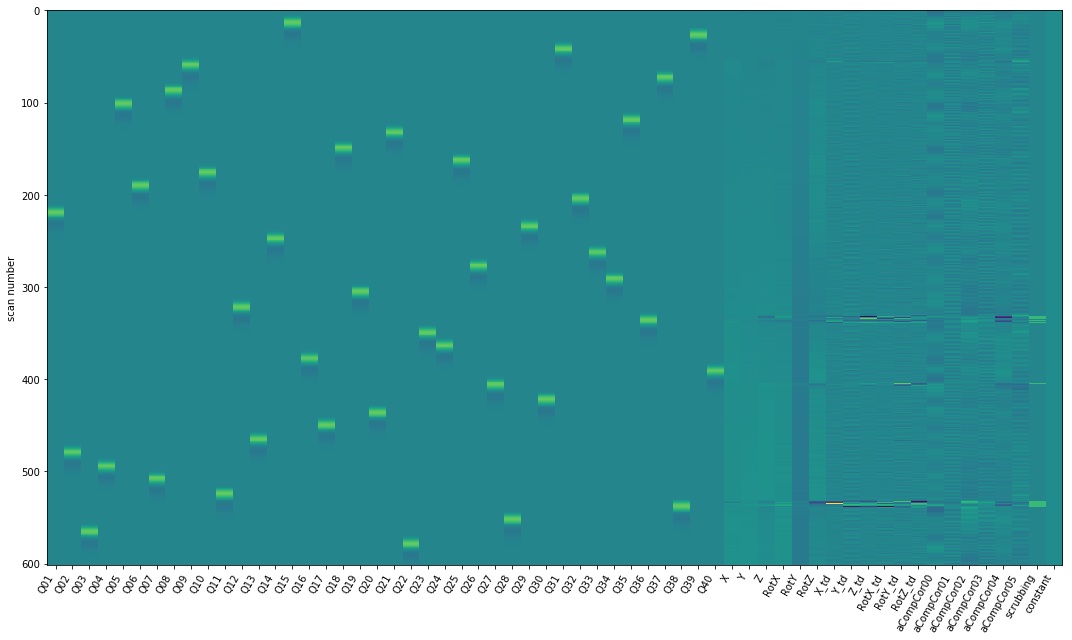

In [8]:
design_matrix = fmri_glm_non_smoothed.design_matrices_[0]
fig, ax = plt.subplots(figsize=(15,9))
plot_design_matrix(design_matrix, ax=ax)

Defining contrast
=========================

In [9]:
trial_dummies = pd.get_dummies(design_matrix.columns)
trial_contrasts = pd.DataFrame.to_dict(trial_dummies, orient = 'list')
trial_contrasts['overall'] = [1 if i[0] == 'Q' else 0 for i in design_matrix.columns]

/home/finc/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


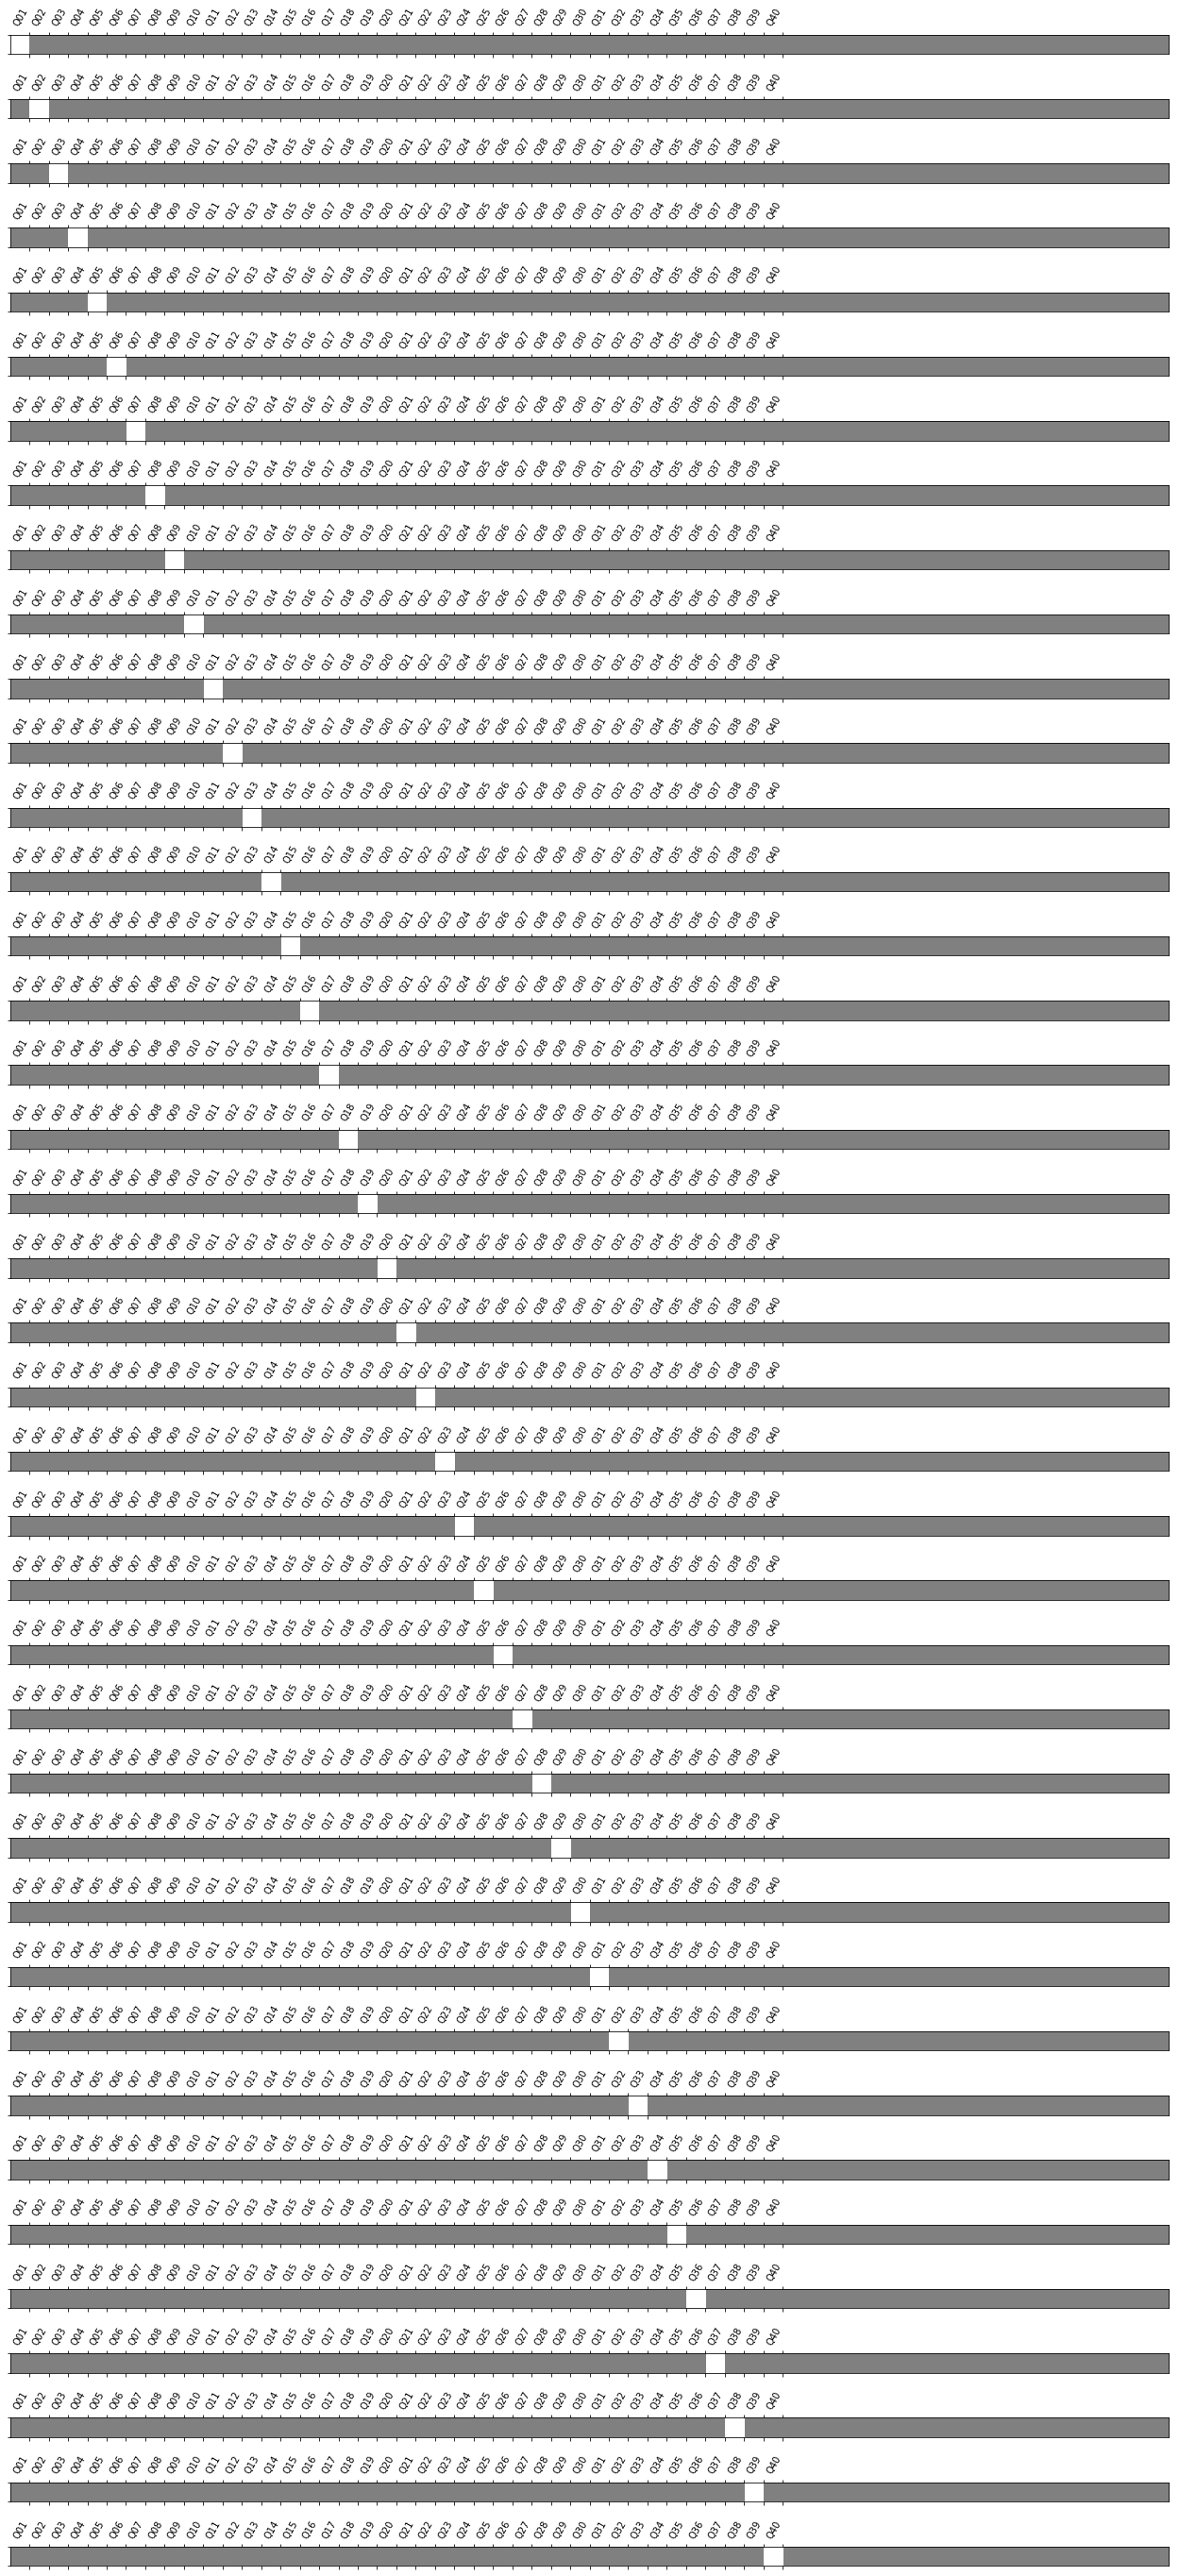

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
#fig, ax = plt.subplots((40,1) figsize=(20,16))
fig, ax = plt.subplots(n_trials, 1)
fig.set_size_inches(22, 50)

for i in range(n_trials ):
    plt.figure()
    _ = plot_contrast_matrix(trial_contrasts['Q{:0>2d}'.format(i+1)] , design_matrix=design_matrix.iloc[:,0:40], ax=ax[i])

Trial effects estimation
------------------------------------

In [ ]:
betas = np.zeros((n_trials, 89, 105, 89))

for i in range(n_trials):
    beta = fmri_glm_non_smoothed.compute_contrast(np.asarray(trial_contrasts['Q{:0>2d}'.format(i+1)]), output_type='z_score')
    betas[i,:,:,:] = beta.get_fdata()
    plot_stat_map(nib.Nifti1Image(beta
                                 # [i,:,:,:], 
                                 # beta.affine, 
                                 # beta.header
                                 ), threshold=3,
              display_mode='z', cut_coords=8, black_bg=False,
              title='Q{:0>2d}'.format(i+1))

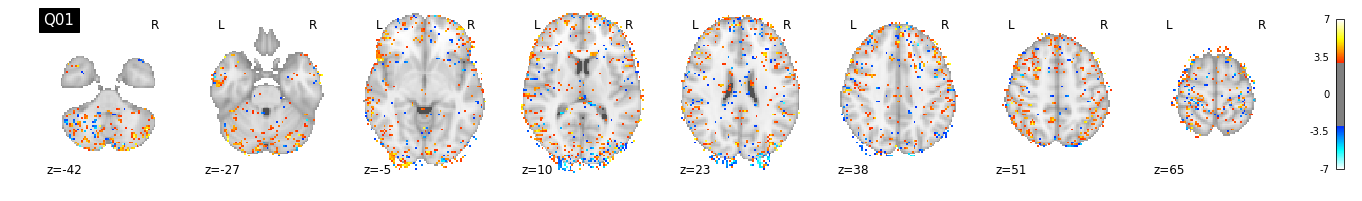

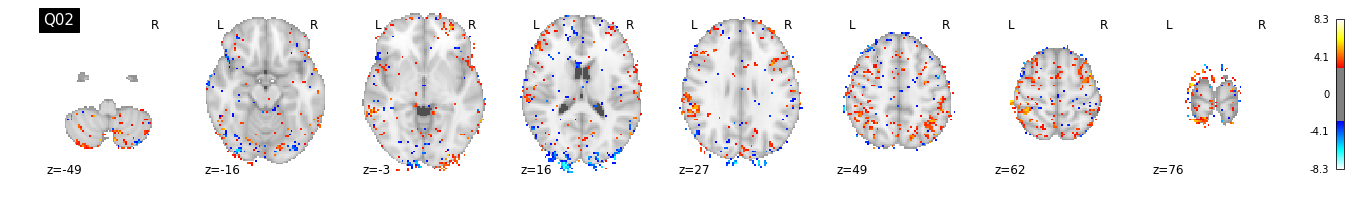

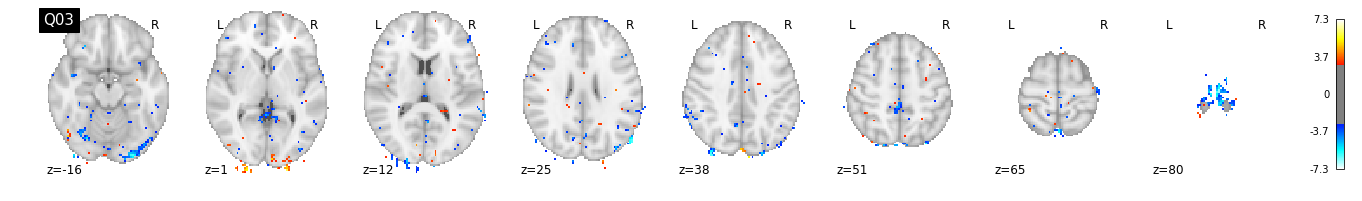

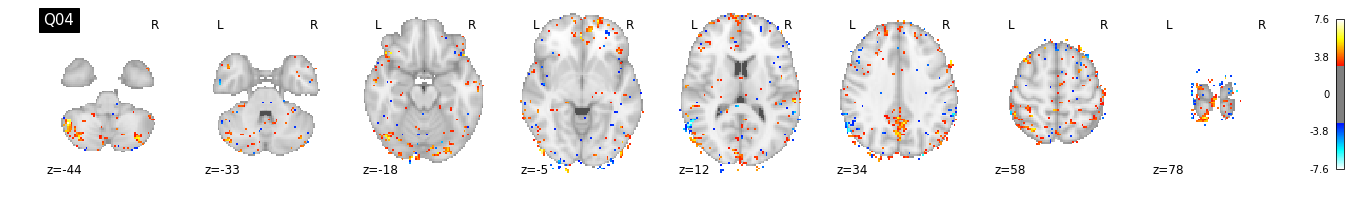

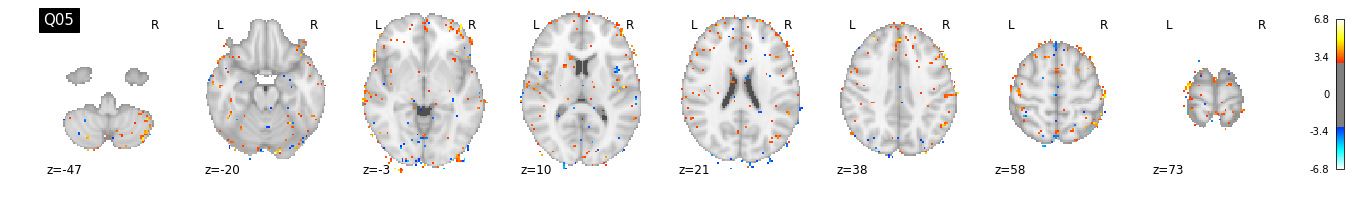

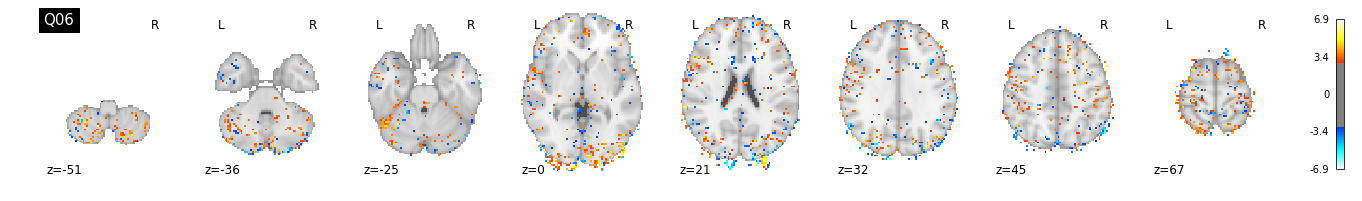

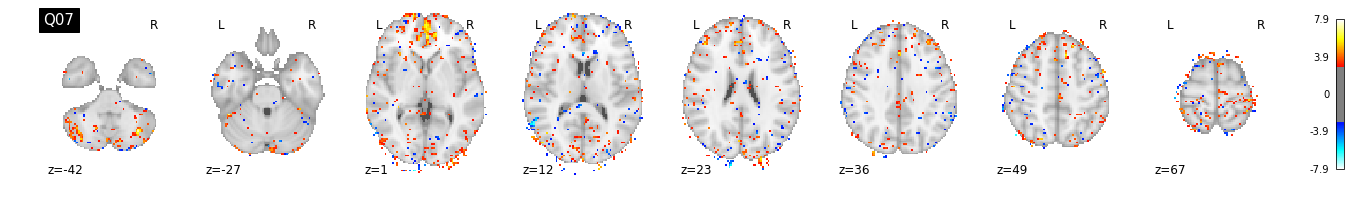

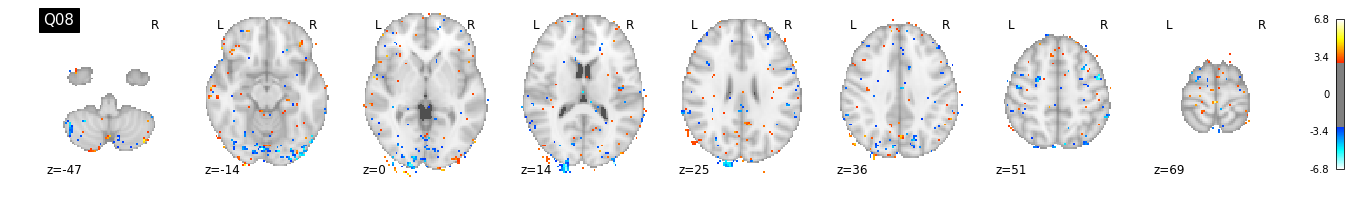

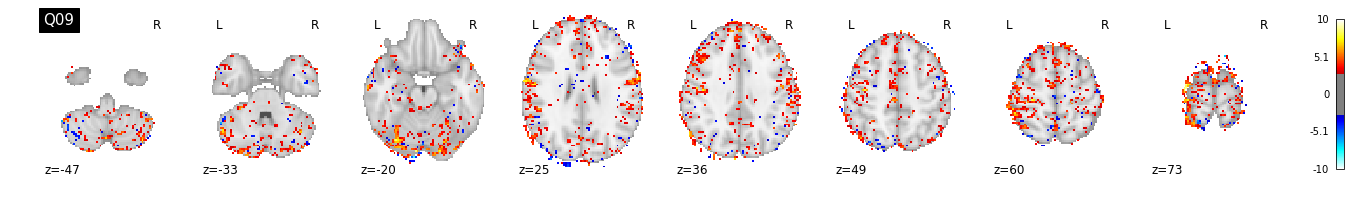

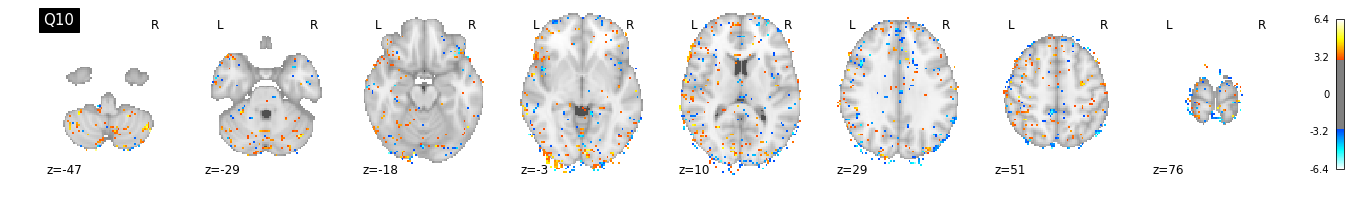

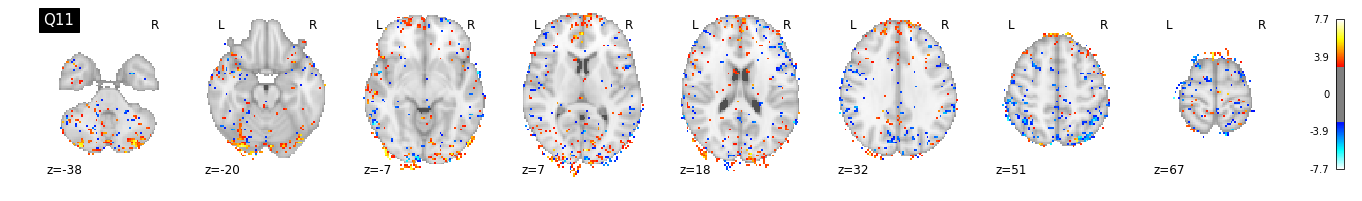

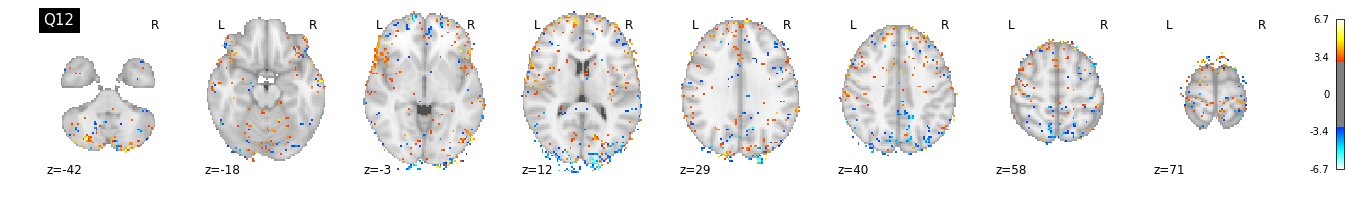

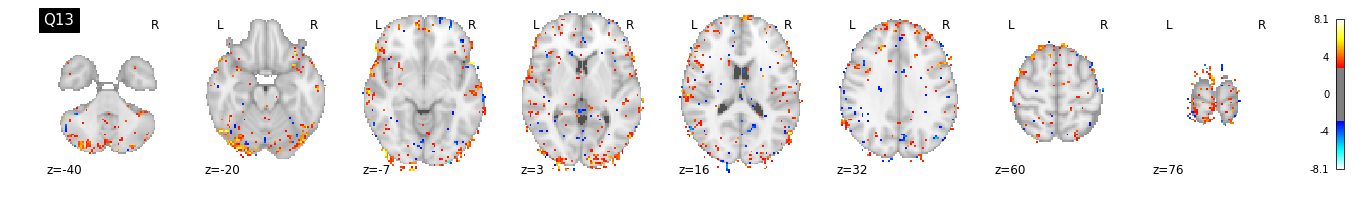

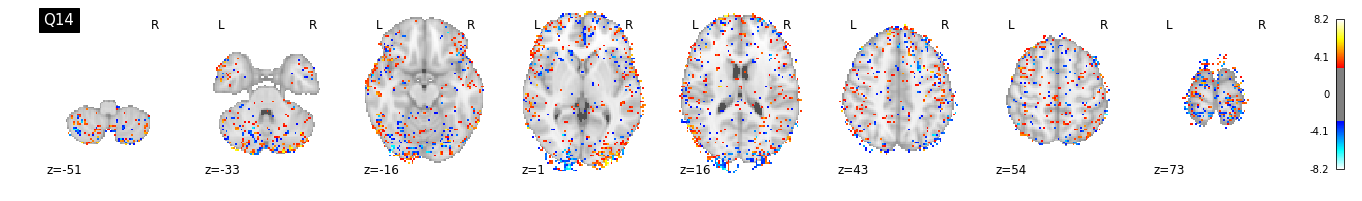

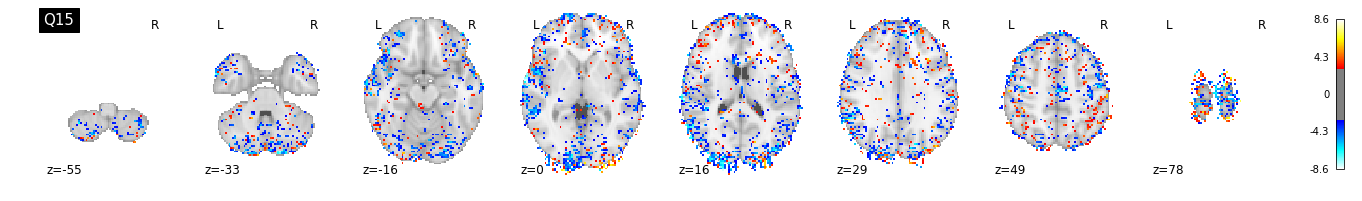

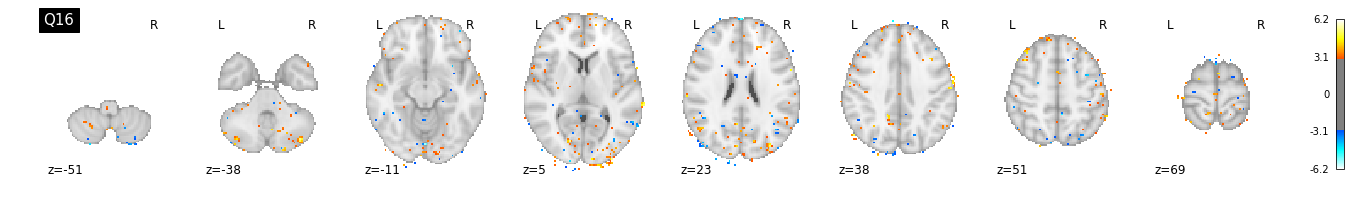

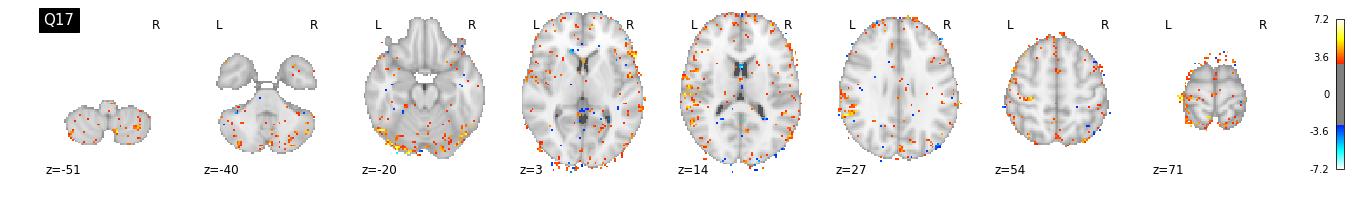

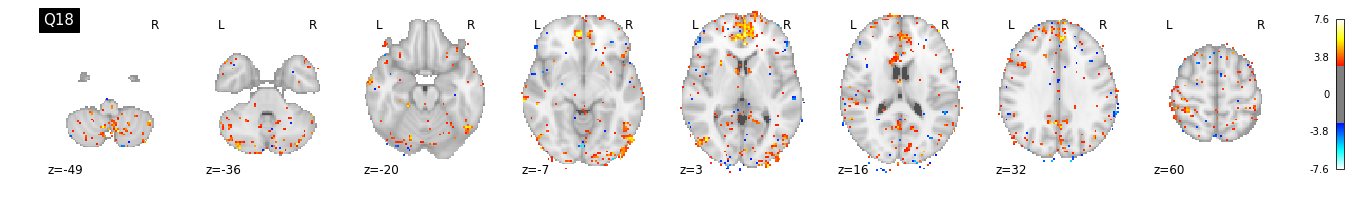

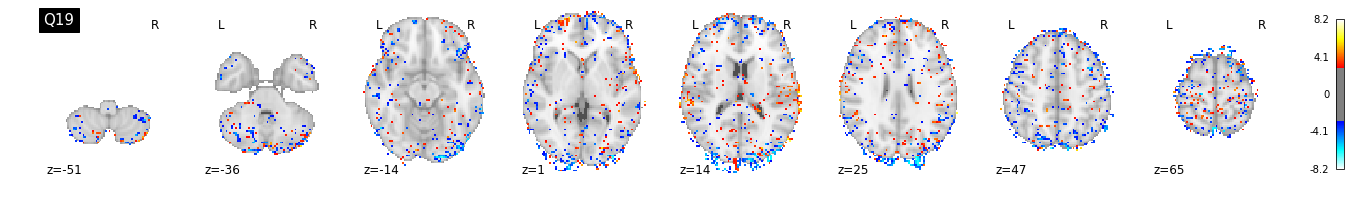

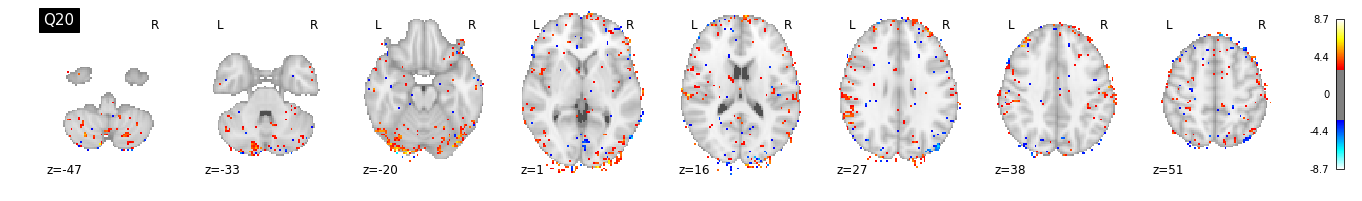

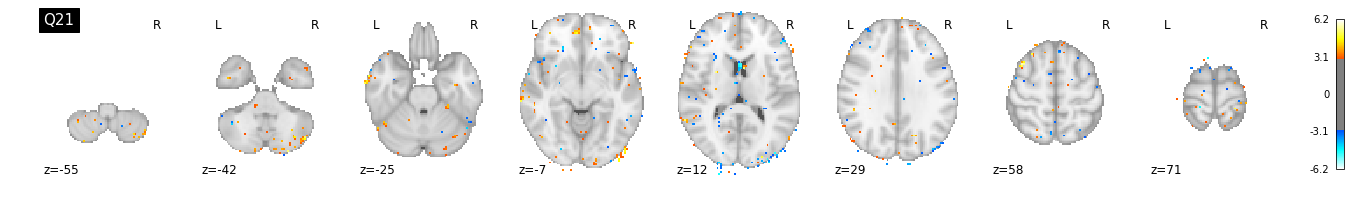

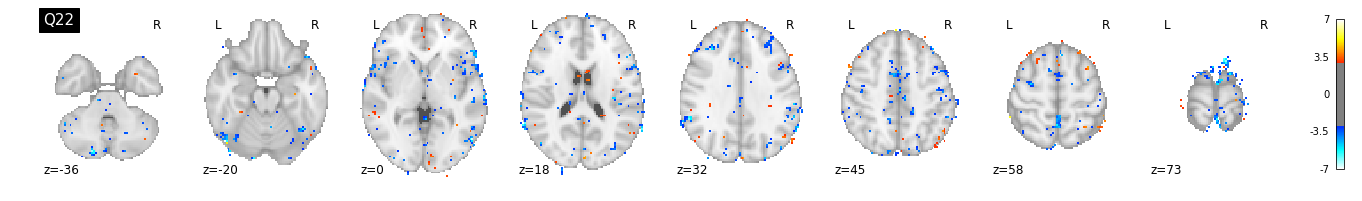

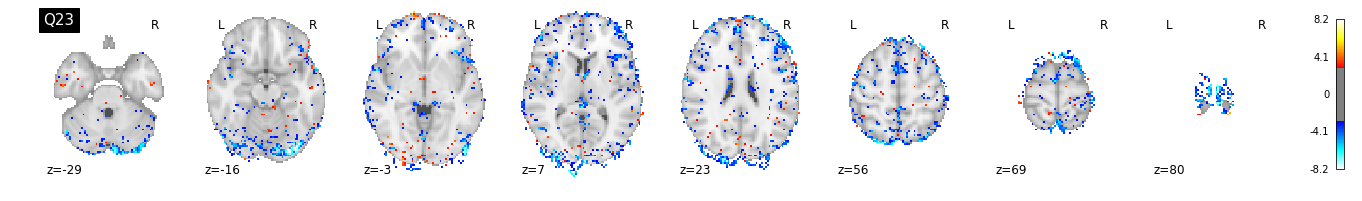

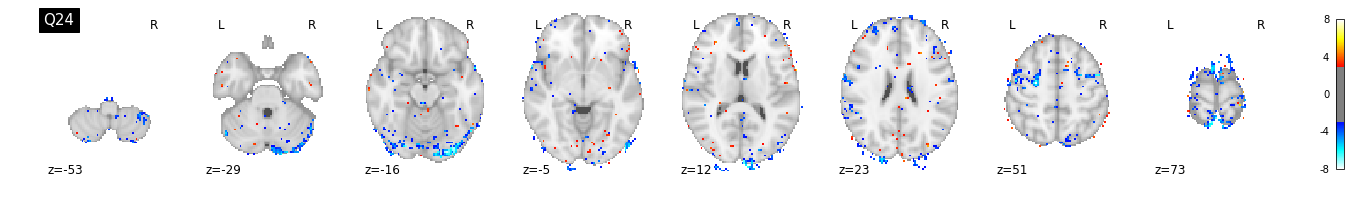

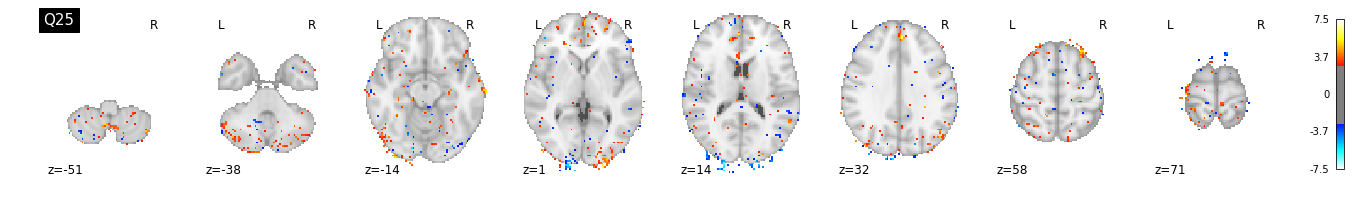

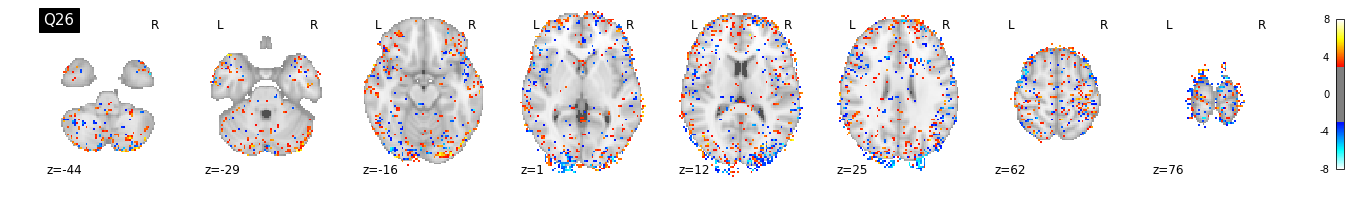

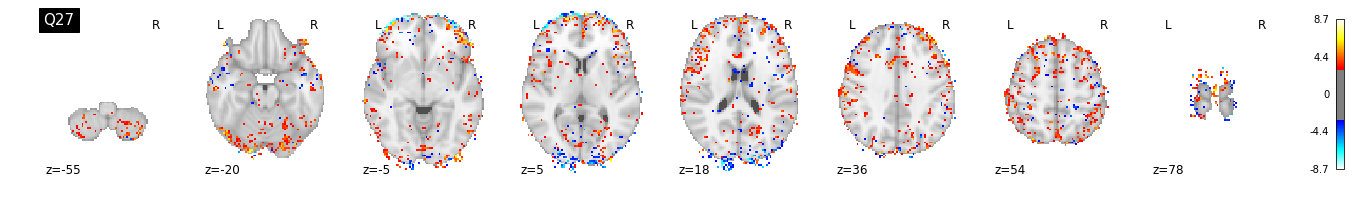

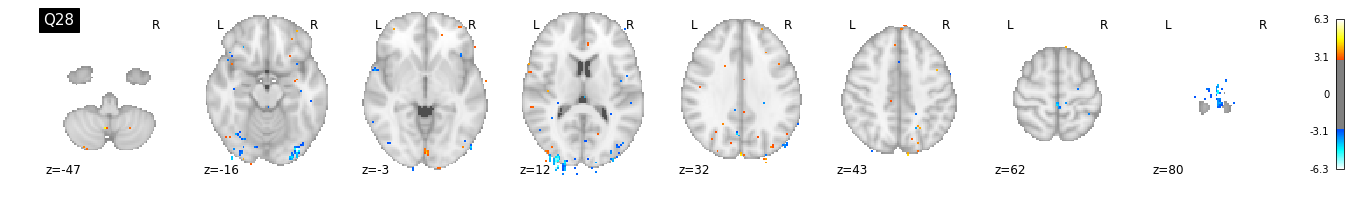

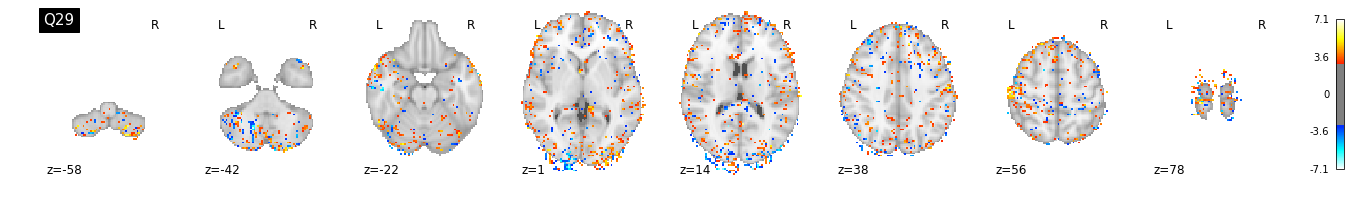

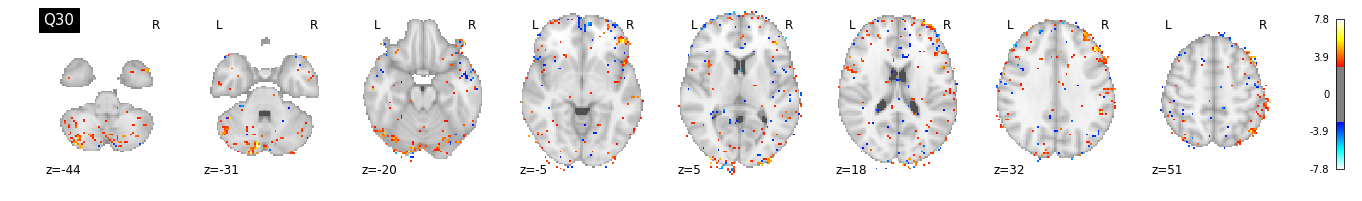

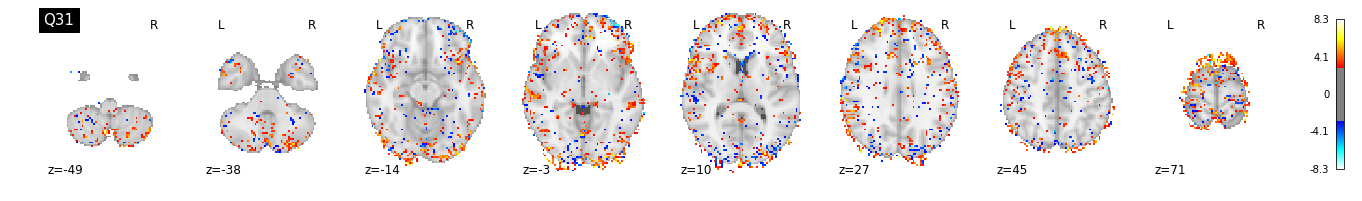

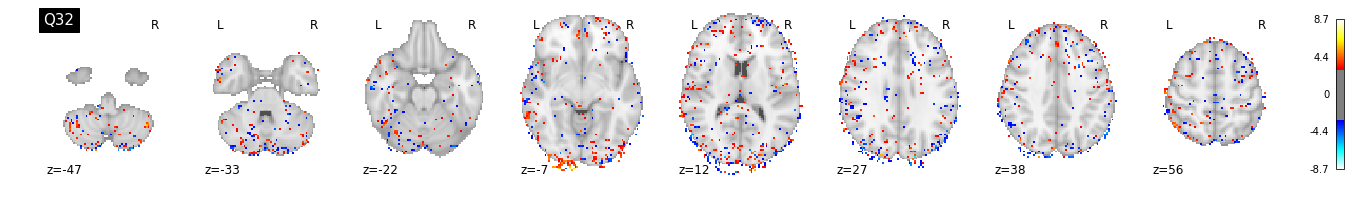

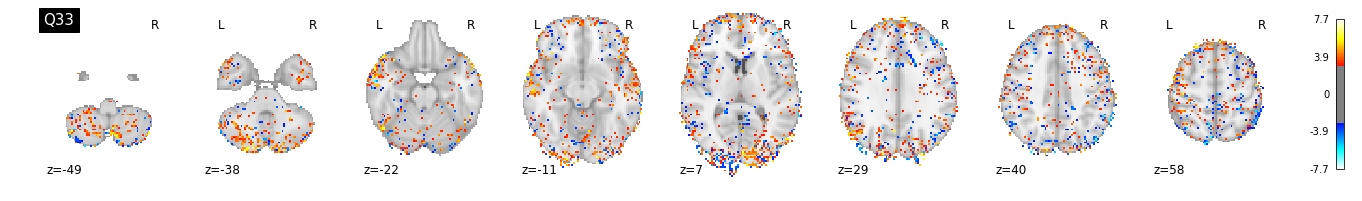

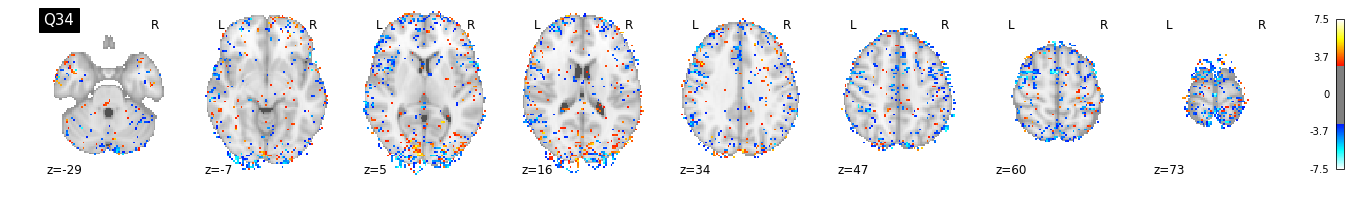

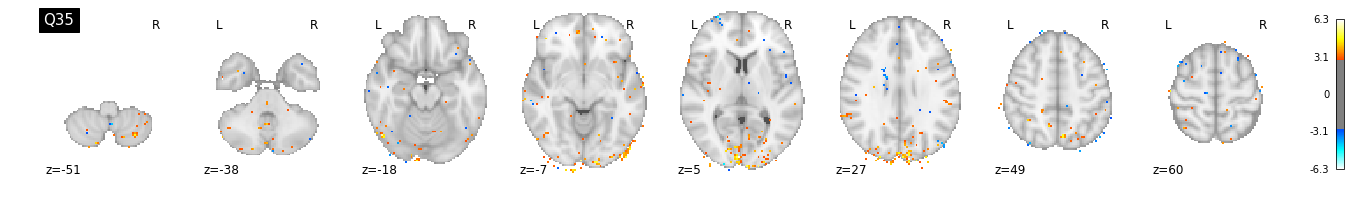

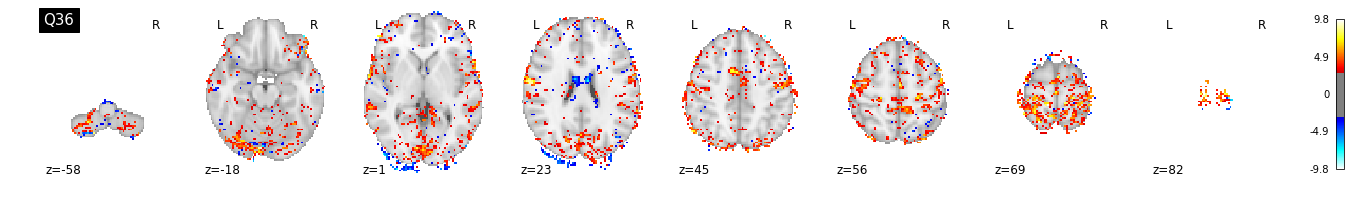

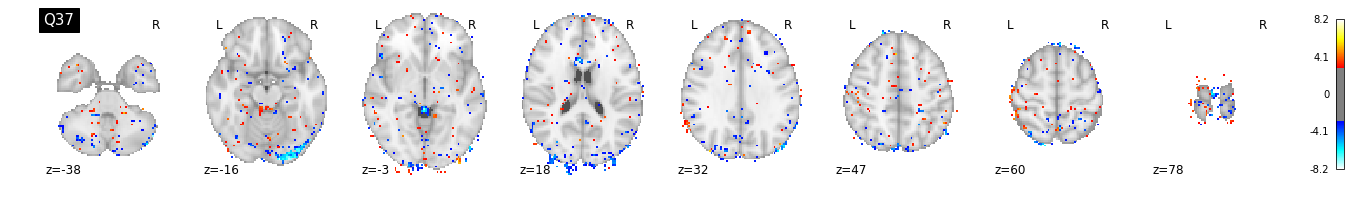

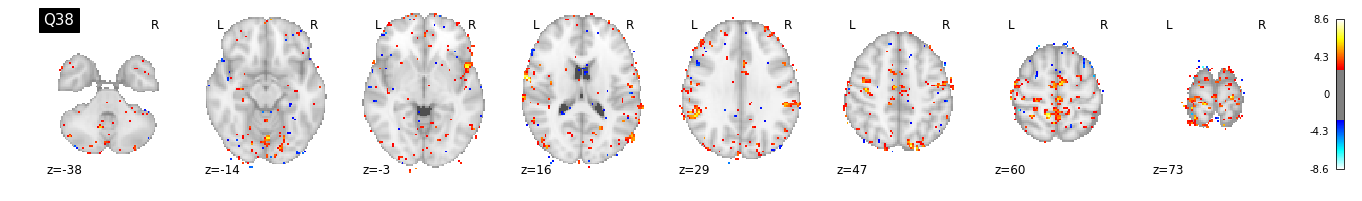

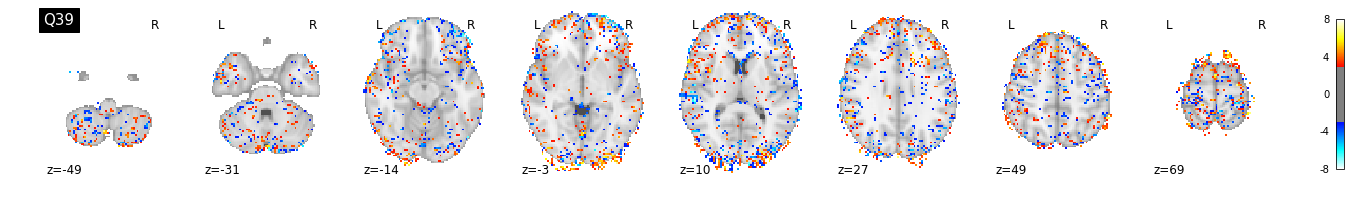

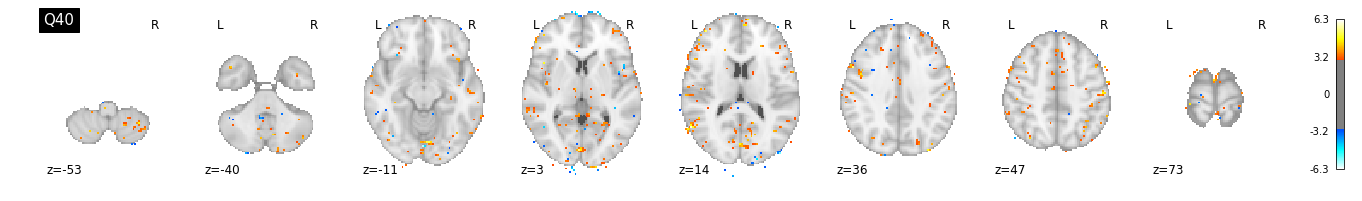

In [12]:
#for i in range(n_trials):    
#    plot_stat_map(nib.Nifti1Image(betas[i,:,:,:], beta.affine, beta.header), threshold=3,
#              display_mode='z', cut_coords=8, black_bg=False,
#              title='Q{:0>2d}'.format(i+1))

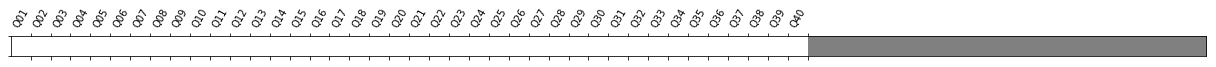

In [13]:
# Overall survey effect contrast

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(17, 30)
plot_contrast_matrix(trial_contrasts['overall'] , design_matrix=design_matrix.iloc[:,0:40], ax = ax)

In [14]:
fmri_img_smoothed = image.smooth_img(fmri_img, fwhm=4)
fmri_glm_smoothed = fmri_glm.fit(fmri_img_smoothed, events, confounds=confounds_clean)

MemoryError: 

In [ ]:
efect_of_survey = fmri_glm_smoothed.compute_contrast(np.asarray(trial_contrasts['overall']), output_type='z_score')

plot_stat_map(efect_of_survey, threshold=3,
              display_mode='z', cut_coords=8, black_bg=False,
              title='Overall')